In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from scipy.stats import shapiro
%matplotlib inline
df=pd.read_csv("ObesityData.csv")
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [20]:
df=df.drop(columns=['Height','Weight'])
print(df.shape)

(2111, 15)


In [21]:
df.rename(columns={'family_history_with_overweight':'FHWO'}, inplace=True)

In [22]:
columns = ["Gender", 'FHWO', "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"]

for col in columns:
    df[col] = df[col].astype('category')


In [23]:
categorical_cols = df.select_dtypes(include='category')

# Analyze each categorical column
for col in categorical_cols:
    # Get the unique values and their counts
    unique_counts = df[col].value_counts()

    # Print column name, total entries, and unique values with counts
    print(f"\n** Column Name: {col} **")
    print(f"- Total Entries: {df[col].count()}")
    print(f"- Unique Values:")
    print(unique_counts)


** Column Name: Gender **
- Total Entries: 2111
- Unique Values:
Gender
Male      1068
Female    1043
Name: count, dtype: int64

** Column Name: FHWO **
- Total Entries: 2111
- Unique Values:
FHWO
yes    1726
no      385
Name: count, dtype: int64

** Column Name: FAVC **
- Total Entries: 2111
- Unique Values:
FAVC
yes    1866
no      245
Name: count, dtype: int64

** Column Name: CAEC **
- Total Entries: 2111
- Unique Values:
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

** Column Name: SMOKE **
- Total Entries: 2111
- Unique Values:
SMOKE
no     2067
yes      44
Name: count, dtype: int64

** Column Name: SCC **
- Total Entries: 2111
- Unique Values:
SCC
no     2015
yes      96
Name: count, dtype: int64

** Column Name: CALC **
- Total Entries: 2111
- Unique Values:
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

** Column Name: MTRANS **
- Total Entries: 2111
- Un

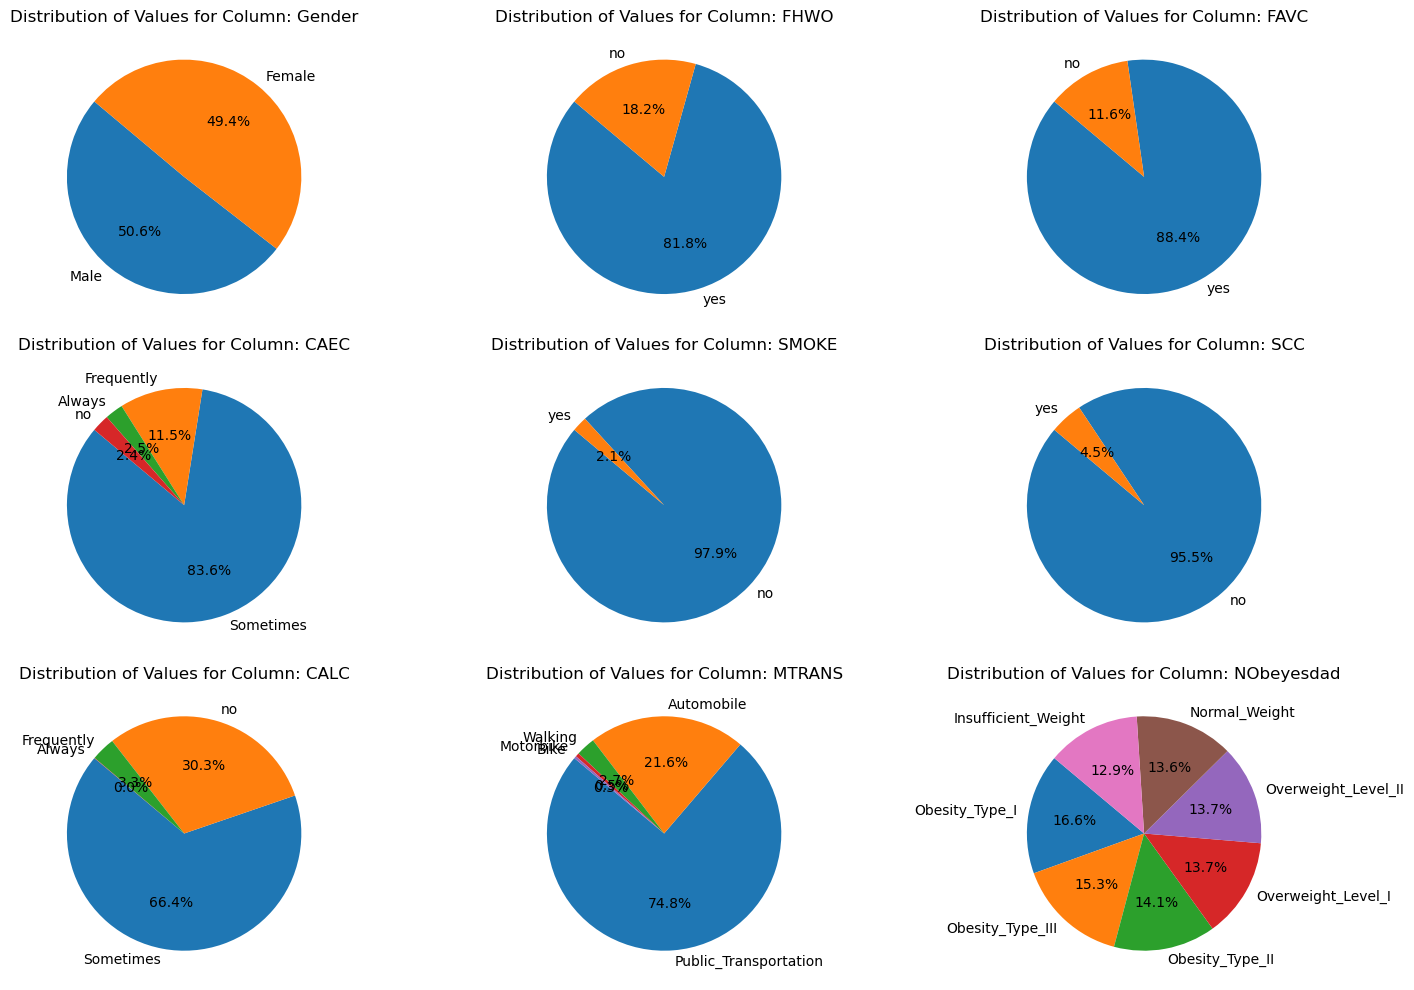

In [37]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np  # Import NumPy (if available)

# # Assuming you have loaded your data into a Pandas DataFrame named 'df'

# # Convert specified columns to categorical type
# columns = ["Gender", 'FHWO', "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"]
# for col in columns:
#     df[col] = df[col].astype('category')

# # Get the categorical columns
# categorical_cols = df.select_dtypes(include='category')

# # Set a maximum number of columns (adjust as needed)
# max_cols = 3

# # Create subplots for potential multiple categorical columns
# num_cols = len(categorical_cols)
# rows = min(num_cols, 3)  # Adjust rows to display at most 4 plots
# cols = min(np.ceil(num_cols / 3), max_cols)  # Limit columns to max_cols
# fig, axes = plt.subplots(rows, cols, figsize=(15, 10))  # Adjust figsize as needed

# # Create bar charts for each column with error handling
# for i, col in enumerate(categorical_cols):
#     unique_counts = df[col].value_counts()

#     # Check for empty plots (no unique values)
#     if unique_counts.empty:
#         print(f"Column '{col}' has no unique values. Skipping plot.")
#         continue

#     # Create bar chart and set properties
#     axes.flat[i].bar(unique_counts.index, unique_counts.values)
#     axes.flat[i].set_title(f"Unique Value Counts for Column: {col}")
#     axes.flat[i].set_xlabel("Unique Value")
#     axes.flat[i].set_ylabel("Count")
#     axes.flat[i].set_xticks(unique_counts.index, labels=unique_counts.index, rotation=45, ha='right')  # Rotate x-axis labels

# # Tight layout for better spacing
# plt.tight_layout()

# # Display the charts
# plt.show()


import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded your data into a Pandas DataFrame named 'df'

# Convert specified columns to categorical type
columns = ["Gender", 'FHWO', "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"]
for col in columns:
    df[col] = df[col].astype('category')

# Get the categorical columns
categorical_cols = df.select_dtypes(include='category')

# Set a maximum number of columns (adjust as needed)
max_cols = 3

# Create subplots for potential multiple categorical columns
num_cols = len(categorical_cols)
rows = min(num_cols, 3)  # Adjust rows to display at most 4 plots
cols = min(num_cols, max_cols)  # Limit columns to max_cols
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))  # Adjust figsize as needed

# Flatten the axes if necessary
if num_cols > 1:
    axes = axes.flatten()

# Create pie charts for each column with error handling
for i, col in enumerate(categorical_cols):
    value_counts = df[col].value_counts()

    # Check for empty plots (no unique values)
    if value_counts.empty:
        print(f"Column '{col}' has no unique values. Skipping plot.")
        continue

    # Create pie chart and set properties
    axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f"Distribution of Values for Column: {col}")

# Tight layout for better spacing
plt.tight_layout()

# Display the charts
plt.show()


In [41]:
!pip install squarify

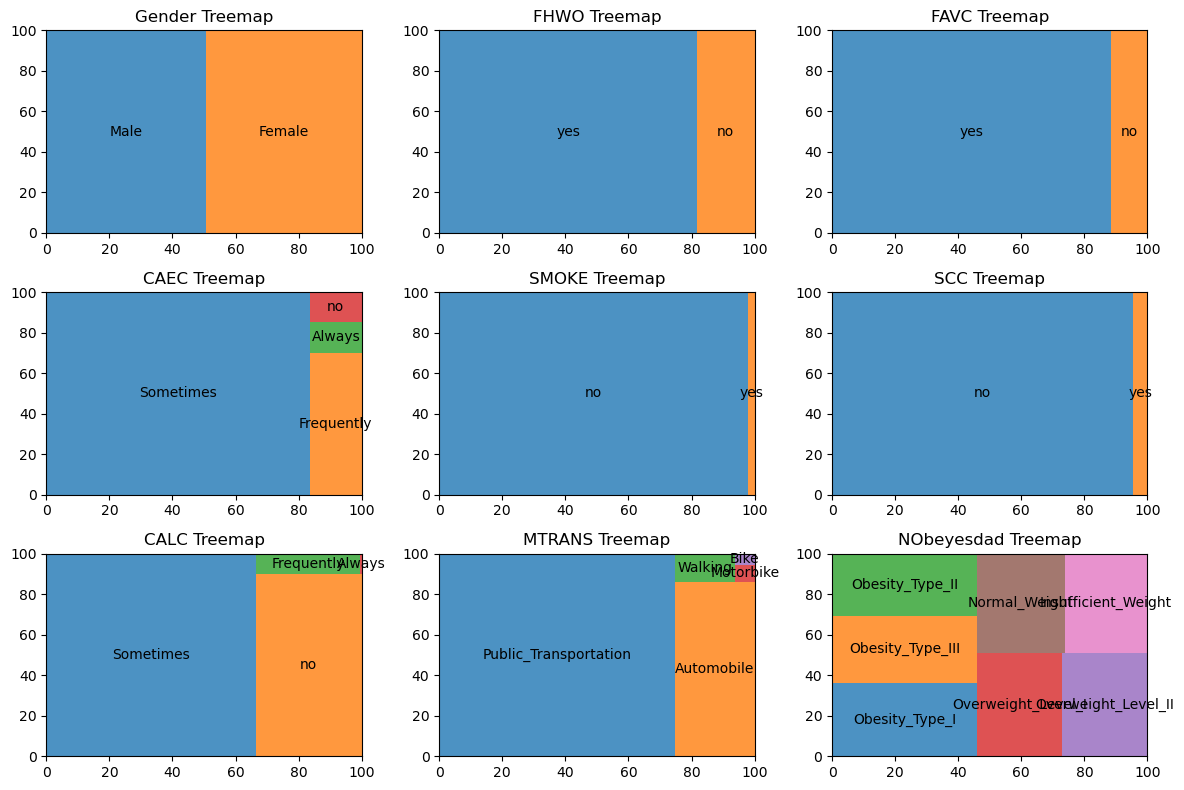

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify  # Import the squarify library

# Assuming you have loaded your data into a Pandas DataFrame named 'df'

# Convert specified columns to categorical type
columns = ["Gender", 'FHWO', "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"]
for col in columns:
    df[col] = df[col].astype('category')

# Get the categorical columns
categorical_cols = df.select_dtypes(include='category')

# Create a color palette for the treemap
colors = plt.cm.tab10.colors  # You can change the colormap as desired

# Plotting
plt.figure(figsize=(12, 8))

# Iterate over each categorical column and create a treemap
for i, col in enumerate(categorical_cols):
    value_counts = df[col].value_counts()

    # Plot treemap for each column
    plt.subplot(3, 3, i + 1)
    squarify.plot(sizes=value_counts, label=value_counts.index, color=colors, alpha=0.8)
    plt.title(f"{col} Treemap")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [44]:
!pip install lightgbm

  Using cached lightgbm-4.3.0-py3-none-win_amd64.whl.metadata (19 kB)
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
    --------------------------------------- 0.0/1.3 MB ? eta -:--:--
    --------------------------------------- 0.0/1.3 MB ? eta -:--:--
    --------------------------------------- 0.0/1.3 MB 262.6 kB/s eta 0:00:05
   - -------------------------------------- 0.0/1.3 MB 326.8 kB/s eta 0:00:04
   - -------------------------------------- 0.0/1.3 MB 326.8 kB/s eta 0:00:04
   - -------------------------------------- 0.0/1.3 MB 326.8 kB/s eta 0:00:04
   - -------------------------------------- 0.0/1.3 MB 326.8 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.3 MB 218.6 kB/s eta 0:00:06
   -- ------------------------------------- 0.1/

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\itsme\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\itsme\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\itsme\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\itsme\anaconda3\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\itsme\anaconda3\Lib\http\client.py", line 466, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "C:\Users\itsme\anaconda3\Lib\socket.py", line 706, in readinto
    return self._sock.recv_into(b)
           ^


   ------------------ --------------------- 0.6/1.3 MB 37.4 kB/s eta 0:00:20
   ------------------ --------------------- 0.6/1.3 MB 37.4 kB/s eta 0:00:20
   ------------------ --------------------- 0.6/1.3 MB 37.4 kB/s eta 0:00:20
   ------------------ --------------------- 0.6/1.3 MB 37.4 kB/s eta 0:00:20
   ------------------ --------------------- 0.6/1.3 MB 37.4 kB/s eta 0:00:20
   ------------------ --------------------- 0.6/1.3 MB 37.4 kB/s eta 0:00:20
   ------------------ --------------------- 0.6/1.3 MB 37.4 kB/s eta 0:00:20
   ------------------ --------------------- 0.6/1.3 MB 37.4 kB/s eta 0:00:20
   ------------------ --------------------- 0.6/1.3 MB 37.4 kB/s eta 0:00:20
   ------------------ --------------------- 0.6/1.3 MB 37.4 kB/s eta 0:00:20
   ------------------ --------------------- 0.6/1.3 MB 37.4 kB/s eta 0:00:20
   ------------------ --------------------- 0.6/1.3 MB 37.4 kB/s eta 0:00:20
   ------------------ --------------------- 0.6/1.3 MB 37.4 kB/s eta 0:00:2

In [2]:
!pip install pyarrow-hotfix

